In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd
import dask.multiprocessing
import numpy as np
import itertools
%matplotlib inline

`trafic_data_1.csv`は$\alpha$を常に変えている.

`trafic_data_2.csv`は$\alpha$を[0.1~1.0]において100等分してそれぞれの$\alpha$において100こサンプリングしている


In [32]:
%%time
dask_df = dd.read_csv('trafic_data_1.csv', header=None)
Data = dask_df.compute(get=dask.multiprocessing.get)

Process ForkPoolWorker-9:
Process ForkPoolWorker-8:
Process ForkPoolWorker-11:
Traceback (most recent call last):
Process ForkPoolWorker-10:
Traceback (most recent call last):
  File "/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/multiprocessing/process.py", line 93, in run

KeyboardInterrupt: 

In [36]:
%%time
Data_train  = pd.read_csv('trafic_data_1.csv', header=None)

CPU times: user 3.21 s, sys: 199 ms, total: 3.41 s
Wall time: 3.42 s


大きデータに対してデータ操作を行うとそれなりに時間がかかる.


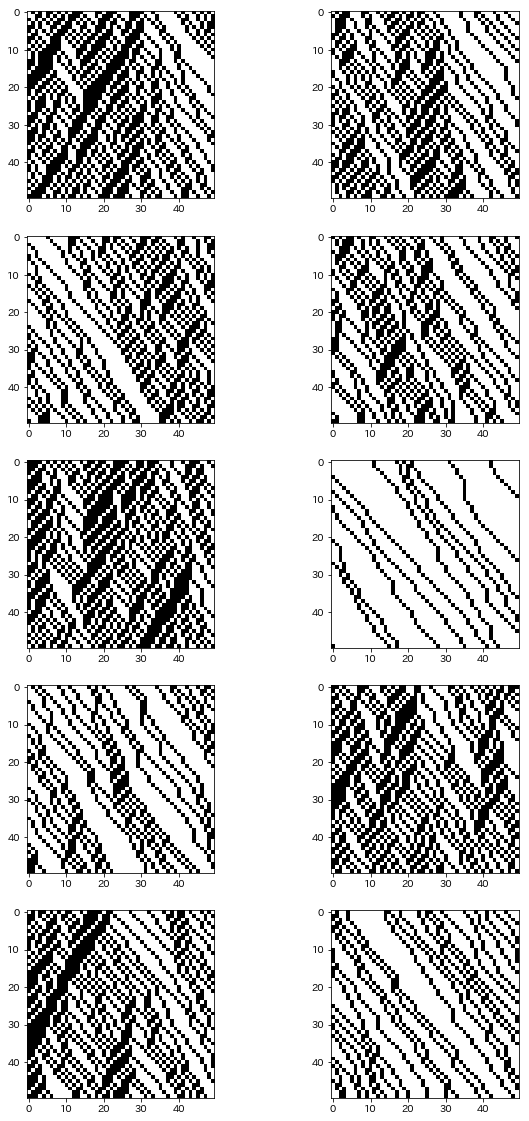

In [115]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
for idx, x in zip(itertools.product(list(range(0, 5)), [0, 1]),
                  Data_train.reindex(np.random.permutation(Data_train.index)).values[:10, :-1].astype(float)):
    ax[idx[0], idx[1]].imshow(x.reshape(50, 50), cmap=plt.cm.gray_r)

In [37]:
Data_train.columns = list(range(1, 2501)) + ['alpha']

$\alpha_c=0.5$

In [38]:
Data_train.head()

,1,2,3,4,5,6,7,8,9,10,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,alpha
0,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0.10000
1,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0.10009
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.10018
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.10027
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0.10036


In [39]:
X_train = Data_train.iloc[:, :-1].values
X_train.shape

(10000, 2500)

# $\alpha < \alpha_c = 0.5$ にデータにラベル0, $\alpha \geq \alpha_c = 0.5$にラベル1をふる

In [40]:
# 取りうるalphaの値
np.unique(Data_train.iloc[:, -1])

array([ 0.1    ,  0.10009,  0.10018, ...,  0.99973,  0.99982,  0.99991])

In [41]:
alpha_c = 0.5
y_train = pd.Series([0 if alpha < alpha_c else 1 for alpha in Data_train.iloc[:, -1]]).ravel()

In [42]:
np.bincount(y_train)

array([4445, 5555])

In [43]:
np.unique(y_train)

array([0, 1])

# テストデータを読み込む

In [44]:
# テストデータを読み込む
Data_test = pd.read_csv('trafic_data_test.csv', header=None)
Data_test.shape

(3000, 2501)

In [45]:
Data_test.columns = list(range(1, 2501)) + ['alpha']
Data_test.head()

,1,2,3,4,5,6,7,8,9,10,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,alpha
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0.1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.1


In [46]:
X_test = Data_test.iloc[:, :-1].values
X_test.shape

(3000, 2500)

# $\alpha < \alpha_c = 0.5$ にデータにラベル0, $\alpha \geq \alpha_c = 0.5$にラベル1をふる

In [47]:
# 取りうるalphaの値
np.unique(Data_test.iloc[:, -1])

array([ 0.1  ,  0.109,  0.118,  0.127,  0.136,  0.145,  0.154,  0.163,
        0.172,  0.181,  0.19 ,  0.199,  0.208,  0.217,  0.226,  0.235,
        0.244,  0.253,  0.262,  0.271,  0.28 ,  0.289,  0.298,  0.307,
        0.316,  0.325,  0.334,  0.343,  0.352,  0.361,  0.37 ,  0.379,
        0.388,  0.397,  0.406,  0.415,  0.424,  0.433,  0.442,  0.451,
        0.46 ,  0.469,  0.478,  0.487,  0.496,  0.505,  0.514,  0.523,
        0.532,  0.541,  0.55 ,  0.559,  0.568,  0.577,  0.586,  0.595,
        0.604,  0.613,  0.622,  0.631,  0.64 ,  0.649,  0.658,  0.667,
        0.676,  0.685,  0.694,  0.703,  0.712,  0.721,  0.73 ,  0.739,
        0.748,  0.757,  0.766,  0.775,  0.784,  0.793,  0.802,  0.811,
        0.82 ,  0.829,  0.838,  0.847,  0.856,  0.865,  0.874,  0.883,
        0.892,  0.901,  0.91 ,  0.919,  0.928,  0.937,  0.946,  0.955,
        0.964,  0.973,  0.982,  0.991])

In [48]:
alpha_c = 0.5
y_test = pd.Series([0 if alpha < alpha_c else 1 for alpha in Data_test.iloc[:, -1]]).ravel()

In [49]:
np.bincount(y_test)

array([1350, 1650])

# MLP で識別

In [50]:
from sklearn.neural_network import MLPClassifier

## 隠れそう1層　隠れ素子１００

In [51]:
mlp_100 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                       alpha=0.0001)# alpha: 正則化係数　大きいほど正則かが強く働く

In [52]:
%%time
 mlp_100.fit(X_train, y_train)

CPU times: user 57.1 s, sys: 10.7 s, total: 1min 7s
Wall time: 34.2 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [53]:
mlp_100.score(X_test, y_test)

0.88533333333333331

In [56]:
accuracy_100 = []
alphas=np.unique(Data_test.iloc[:, -1])
for alpha in alphas:
    accuracy_100.append(mlp_100.score(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1], 
                             y_test.ravel()[Data_test.loc[:, 'alpha']==alpha]))

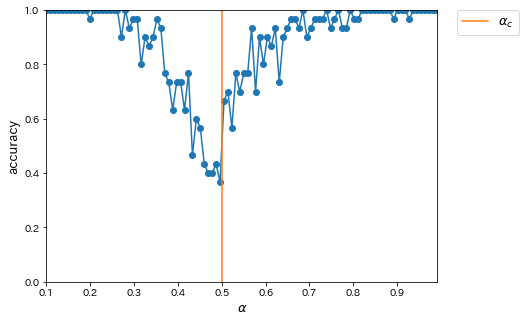

In [57]:
plt.figure(figsize=(7, 5))
plt.plot(alphas, accuracy_100, marker='o')
plt.axvline(x=alpha_c, c=plt.cm.tab10(1), label=r'$\alpha_c$')
plt.xlim(alphas.min(), alphas.max())
plt.ylim(0.0, 1.0)
plt.xlabel(r'$\alpha$', fontsize=13)
plt.ylabel('accuracy', fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',
           borderaxespad=0, fontsize=13)

In [59]:
probabilities_0 = []

for alpha in alphas:
    probabilities_0.append(mlp_100.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 0].mean())
probabilities_0 = np.array(probabilities_0)

In [60]:
probabilities_1 = []

for alpha in alphas:
    probabilities_1.append(mlp_100.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 1].mean())
probabilities_1 = np.array(probabilities_1)

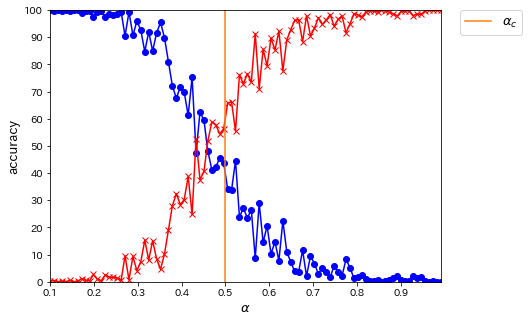

In [61]:
fig, ax = plt.subplots(1,1,figsize=(7, 5))
ax.plot(alphas, probabilities_0*100, marker='o', c='b')
ax.plot(alphas, probabilities_1*100, marker='x', c='r')
ax.axvline(x=alpha_c, c=plt.cm.tab10(1), label=r'$\alpha_c$')
ax.set_xlim(alphas.min(), alphas.max())
ax.set_ylim(0, 100)
ax.set_xlabel(r'$\alpha$', fontsize=13)
ax.set_ylabel('accuracy', fontsize=13)
ax.set_yticks([i*10 for i in range(11)])
ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',
          borderaxespad=0, fontsize=13)

In [62]:
mat = pd.DataFrame(probabilities_0)
mat = mat.T

In [63]:
mat_con = mat
for _ in range(100):
    mat_con = pd.concat([mat_con, mat])

In [64]:
XX, YY = np.mgrid[0.1: 1.0: 100j, 0.0: 1.0:101j]

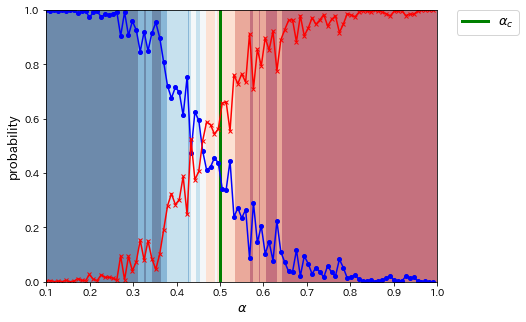

In [65]:
plt.figure(figsize=(7,5))
plt.plot(alphas, probabilities_0, marker='o', c='b', ms=4)
plt.plot(alphas, probabilities_1, marker='x', c='r', ms=4)
plt.axvline(x=alpha_c, c='g', lw=3, zorder=-1, label=r'$\alpha_c$')
plt.ylim(0.0, 1.0)

plt.contourf(XX, YY, mat_con.values.T, cmap=plt.cm.RdBu, alpha=0.6,zorder=-10)
plt.clim(0.0, 1.0)
plt.xlabel(r'$\alpha$', fontsize=13)
plt.ylabel('probability', fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',
          borderaxespad=0, fontsize=13)

## 隠れそう1層　隠れ素子３

In [66]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(3,), activation='relu',
                       alpha=0.0001)# alpha: 正則化係数　大きいほど正則かが強く働く

In [67]:
%%time
mlp_3.fit(X_train, y_train)

CPU times: user 41.5 s, sys: 11.8 s, total: 53.3 s
Wall time: 27.2 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
mlp_3.score(X_test, y_test)

0.83066666666666666

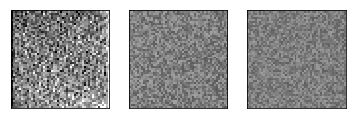

In [26]:
fig, axes = plt.subplots(1, 3)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp_3.coefs_[0].min(), mlp_3.coefs_[0].max()
for coef, ax in zip(mlp_3.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(50, 50), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

In [27]:
accuracy_3 = []
alphas=np.unique(Data_test.iloc[:, -1])
for alpha in alphas:
    accuracy_3.append(mlp_3.score(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1], 
                             y_test.ravel()[Data_test.loc[:, 'alpha']==alpha]))

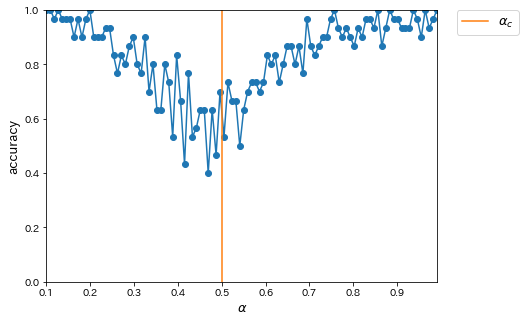

In [28]:
plt.figure(figsize=(7, 5))
plt.plot(alphas, accuracy_3, marker='o')
plt.axvline(x=alpha_c, c=plt.cm.tab10(1), label=r'$\alpha_c$')
plt.xlim(alphas.min(), alphas.max())
plt.ylim(0.0, 1.0)
plt.xlabel(r'$\alpha$', fontsize=13)
plt.ylabel('accuracy', fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',
           borderaxespad=0, fontsize=13)

In [29]:
probabilities_0 = []

for alpha in alphas:
    probabilities_0.append(mlp_3.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 0].mean())

In [30]:
probabilities_1 = []

for alpha in alphas:
    probabilities_1.append(mlp_3.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 1].mean())

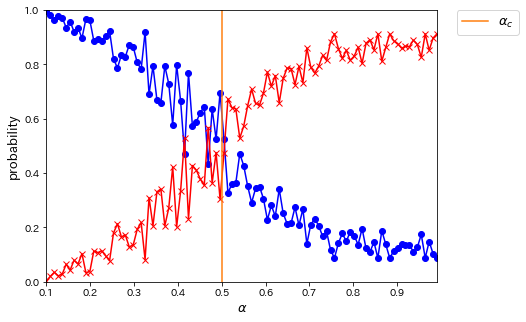

In [31]:
fig, ax = plt.subplots(1,1,figsize=(7, 5))
ax.plot(alphas, probabilities_0, marker='o', c='b')
ax.plot(alphas, probabilities_1, marker='x', c='r')
ax.axvline(x=alpha_c, c=plt.cm.tab10(1), label=r'$\alpha_c$')
ax.set_xlim(alphas.min(), alphas.max())
ax.set_ylim(0.0, 1.0)
ax.set_xlabel(r'$\alpha$', fontsize=13)
ax.set_ylabel('probability', fontsize=13)
ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',
          borderaxespad=0, fontsize=13)

# SVMで識別

最適化関数は以下

\begin{align}
    \min_{w, b, \xi}& \frac{1}{2} \boldsymbol{w}^T\boldsymbol{w} + C \sum_{i=1}^n \xi_i \\
    \mathrm{subject \, to}& \quad y_i( \boldsymbol{w}^T \phi( \boldsymbol{x}_i)) \geq 1 - \xi_i \\
    \xi_i&  \geq 0,\, i=1, \dots, n
\end{align}

## Linear SVM

In [17]:
from sklearn.svm import LinearSVC 

In [18]:
linear_svm = LinearSVC(penalty='l2', loss='hinge'
                       ,C=1.0, random_state=0) # C: 正則化項の強さ  小さいほど正則化が強くなる

In [27]:
%%time
linear_svm.fit(X_train, y_train)

CPU times: user 6.76 s, sys: 111 ms, total: 6.87 s
Wall time: 6.88 s


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [28]:
linear_svm.score(X_test, y_test)

0.85680000000000001

## RBF Kernel SVM

rbf: $\exp(-\gamma \|x-x'\|^2)$

In [21]:
from sklearn.svm import SVC

In [24]:
rbf_svm = SVC(C=1.0, kernel='rbf', gamma='auto',
              random_state=0) # gamma: 小さいと滑らかな識別境界 大きいと複雑な識別境界をえる

In [25]:
%%time
rbf_svm.fit(X_train, y_train)

CPU times: user 57.5 s, sys: 157 ms, total: 57.7 s
Wall time: 57.7 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
rbf_svm.score(X_test, y_test)

0.93200000000000005

In [30]:
# 前処理をしてみる
from sklearn.preprocessing import StandardScaler # 標準化
from sklearn.preprocessing import MinMaxScaler # 標準化

In [32]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train.astype(float))
X_test_ss = ss.transform(X_test.astype(float))

In [36]:
%%time
rbf_svm.fit(X_train_ss, y_train)

CPU times: user 1min 15s, sys: 91.5 ms, total: 1min 15s
Wall time: 1min 15s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
rbf_svm.score(X_test_ss, y_test)

0.93120000000000003

前処理はあまり意味がないことがわかる．
なぜ？


$X$の値が1か0しかないため?

# RandomForest で識別

In [328]:
from sklearn.ensemble import RandomForestClassifier

In [334]:
rf = RandomForestClassifier(n_estimators=500, criterion='gini'
                            , max_features='sqrt', max_depth=None, min_samples_split=2, n_jobs=-1)

In [335]:
%%time
rf.fit(X_train, y_train)

CPU times: user 1min 22s, sys: 435 ms, total: 1min 22s
Wall time: 24.7 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [336]:
rf.score(X_test, y_test)

0.91433333333333333

10/30
- 学習データをシャッフルしてみる．
- 学習データの取り方をsls-open.cでやる

- $\beta$固定で$\alpha$を変化させてみる